In [46]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [5]:
new_res_sample = pd.read_csv('new_res_sample.csv')

In [153]:
new_res_sample.head()

,index,signal
0,0,0.5
1,1,0.5
2,2,0.5
3,3,0.5
4,4,0.5


In [2]:
df_train_full = pd.read_csv('train.csv')

In [3]:
df_train_full.head()

,index,TX,TY,X,Y,Z,chi2,ele_P,data_ind,signal
0,0,0.013209,0.067202,66081.937500,52968.695312,11637.0,0.880506,NaN,0,1
1,1,0.014165,0.071018,66100.265625,53058.140625,12930.0,0.522405,NaN,0,1
2,2,0.017983,0.069956,66118.492188,53147.492188,14223.0,0.971824,NaN,0,1
3,3,0.013956,-0.058355,66121.281250,53082.601562,14223.0,0.771712,NaN,0,1
4,4,0.002209,0.045891,66116.429688,53143.609375,14223.0,0.345887,NaN,0,1


In [42]:
def drow_brick(brick, param):
    plt.figure(figsize=(16, 4))
    plt.subplot(1, 2, 1)
    if (param == 'signal'):
        plt.scatter(brick[brick['signal'] == 1]['Z'], brick[brick['signal'] == 1]['X'])
    elif (param == 'background'):
        plt.scatter(brick[brick['signal'] == 0]['Z'], brick[brick['signal'] == 0]['X'])
    elif (param == 'signal_and_background'):
        plt.scatter(brick['Z'], brick['X'])

    plt.title('EM shower')
    plt.xlabel('Z')
    plt.ylabel('X')

    plt.subplot(1, 2, 2)
    if (param == 'signal'):
        plt.scatter(brick[brick['signal'] == 1]['Z'], brick[brick['signal'] == 1]['Y'])
    elif (param == 'background'):
        plt.scatter(brick[brick['signal'] == 0]['Z'], brick[brick['signal'] == 0]['Y'])
    elif (param == 'signal_and_background'):
        plt.scatter(brick['Z'], brick['Y'])
    plt.title('EM shower')
    plt.xlabel('Z')
    plt.ylabel('Y')
    
    plt.show()

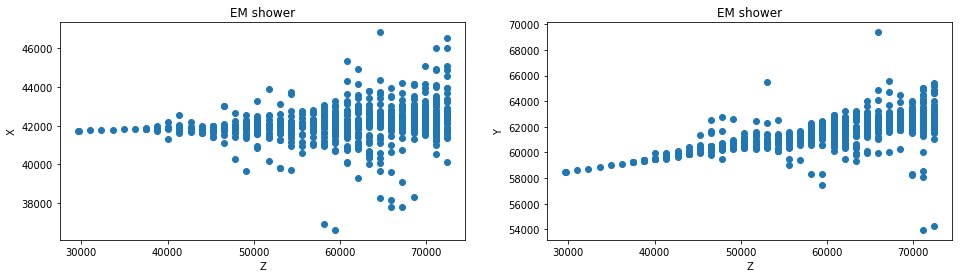

In [137]:
drow_brick(df_train_full[df_train_full['data_ind'] == 7], param='signal')

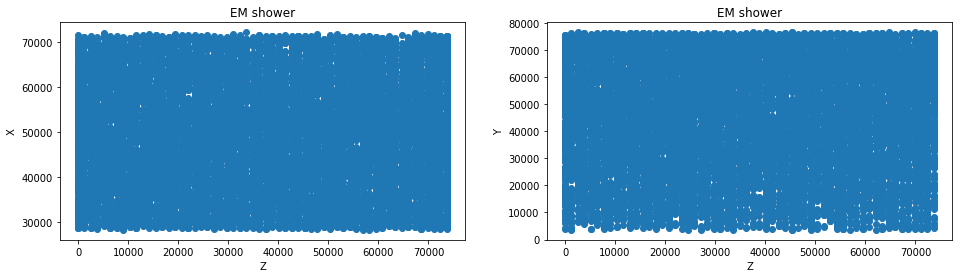

In [44]:
drow_brick(df_train_full[df_train_full['data_ind'] == 123], param='signal_and_background')

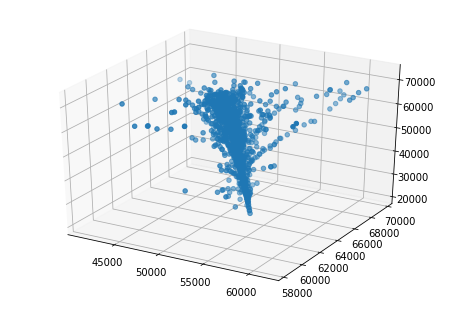

In [45]:
from mpl_toolkits.mplot3d import Axes3D
one_brick_3d = Axes3D(plt.figure())
one_brick = df_train_full[df_train_full['data_ind'] == 123]
one_brick_3d.scatter(one_brick[one_brick['signal'] == 1]['X'], 
                     one_brick[one_brick['signal'] == 1]['Y'],
                     one_brick[one_brick['signal'] == 1]['Z'],)
plt.show()

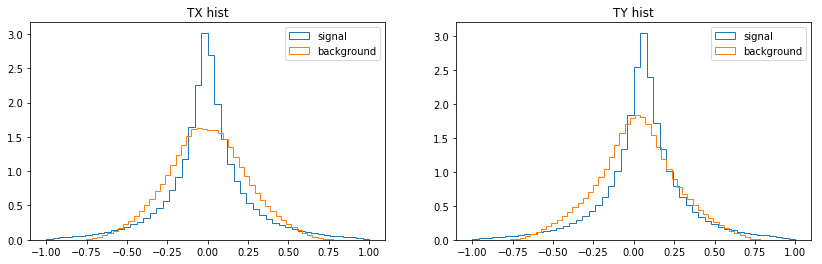

In [141]:
plt.figure(figsize=(14, 4))
plt.subplot(1, 2, 1)
plt.hist(df_train_full[df_train_full['signal']==1]['TX'].dropna(),bins=50,histtype="step", normed=True)
plt.hist(df_train_full[df_train_full['signal']==0]['TX'].dropna(),bins=50,histtype="step", normed=True)
plt.title('TX hist')
plt.legend(['signal','background'])

plt.subplot(1, 2, 2)
plt.hist(df_train_full[df_train_full['signal']==1]['TY'].dropna(),bins=50,histtype="step", normed=True)
plt.hist(df_train_full[df_train_full['signal']==0]['TY'].dropna(),bins=50,histtype="step", normed=True)
plt.title('TY hist')
plt.legend(['signal','background'])
plt.show()

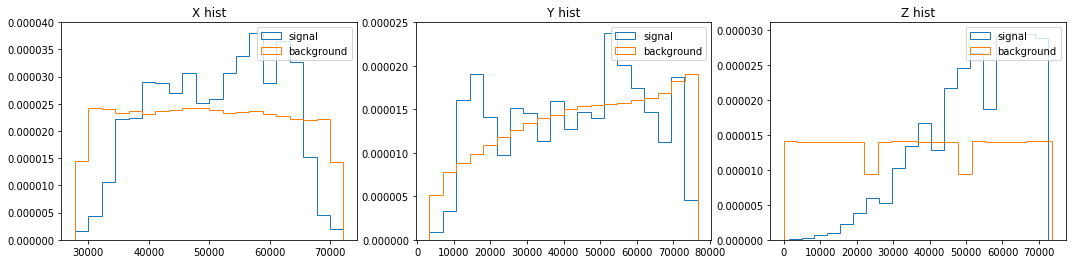

In [101]:
plt.figure(figsize=(18, 4))
plt.subplot(1, 3, 1)
plt.hist(df_train_full[df_train_full['signal']==1]['X'],bins=20,histtype="step", normed=True)
plt.hist(df_train_full[df_train_full['signal']==0]['X'],bins=20,histtype="step", normed=True)
plt.title('X hist')
plt.legend(['signal','background'])

plt.subplot(1, 3, 2)
plt.hist(df_train_full[df_train_full['signal']==1]['Y'],bins=20,histtype="step", normed=True)
plt.hist(df_train_full[df_train_full['signal']==0]['Y'],bins=20,histtype="step", normed=True)
plt.title('Y hist')
plt.legend(['signal','background'])

plt.subplot(1, 3, 3)
plt.hist(df_train_full[df_train_full['signal']==1]['Z'],bins=20,histtype="step", normed=True)
plt.hist(df_train_full[df_train_full['signal']==0]['Z'],bins=20,histtype="step", normed=True)
plt.title('Z hist')
plt.legend(['signal','background'])

plt.show()

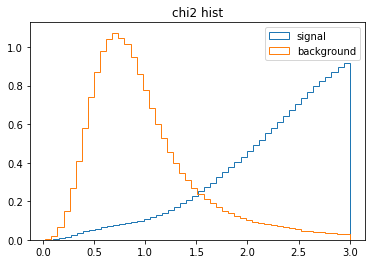

In [107]:
plt.hist(df_train_full[df_train_full['signal']==0]['chi2'].dropna(axis=0),bins=50,histtype="step", normed=True)
plt.hist(df_train_full[df_train_full['signal']==1]['chi2'].dropna(axis=0),bins=50,histtype="step", normed=True)
plt.title('chi2 hist')
plt.legend(['signal','background'])
plt.show()

In [108]:
train_df = df_train_full[df_train_full.signal == 1][['TX','TY','X','Y','Z','chi2','signal']].dropna(axis=0)[:50000]
train_df = pd.concat([train_df,
                      df_train_full[df_train_full.signal == 0][['TX','TY','X','Y','Z','chi2','signal']].dropna(axis=0)[:50000]])

In [74]:
zl = np.unique(df['Z'])
zmin = np.min(zl)
zmax = np.max(zl)
dz = np.diff(zl)[0]
print(len(zl))
print(dz)

550
1293.0


**Decision Tree Classifier**

In [98]:
DecisionTree_clf = DecisionTreeClassifier(max_depth = 2)

In [100]:
cv = KFold(n_splits=5, shuffle=True, random_state=1234)

In [102]:
cv_score = cross_val_score(DecisionTree_clf, 
                           train_df[:,[0,1,2,3,4,5]], train_df[:,[6]], 
                           scoring="roc_auc", n_jobs=-1, cv=cv.split(train_df))

In [104]:
print(np.mean(cv_score))

0.899926380565


In [106]:
DecisionTree_clf.fit(train_df[:,[0,1,2,3,4,5]], train_df[:,[6]])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [ ]:
df_test = pd.read_csv('new_test.csv')

In [108]:
df_for_predict = df_test[['index','chi2']].dropna(axis=0)

In [109]:
prediction = DecisionTree_clf.predict_proba(df_test[['TX','TY','X','Y','Z','chi2']].dropna(axis=0))[:, 1]
df_for_predict['signal'] = prediction

In [111]:
solution = pd.merge(df_test[['index']], df_for_predict[['index','signal']], how='left', on='index')
solution = solution.fillna(0.5)

In [112]:
solution.head()

,index,signal
0,0,0.077269
1,1,0.893677
2,2,0.893677
3,3,0.077269
4,4,0.077269


In [113]:
solution.to_csv('solution_DecisionTree.csv', header=True, index=None)

**Random Forest Classifier**

In [114]:
RandomForest_clf = RandomForestClassifier(n_estimators=250, n_jobs=-1, random_state=1234, 
                             min_samples_split=5, min_samples_leaf=5, max_depth = 6)

In [115]:
cv_score = cross_val_score(RandomForest_clf, 
                           train_df[:,[0,1,2,3,4,5]], train_df[:,6], 
                           scoring="roc_auc", n_jobs=-1, cv=cv.split(train_df))

In [116]:
print(np.mean(cv_score))

0.967978795894


In [120]:
RandomForest_clf.fit(train_df[:,[0,1,2,3,4,5]], train_df[:,6])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=6, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=5,
            min_weight_fraction_leaf=0.0, n_estimators=250, n_jobs=-1,
            oob_score=False, random_state=1234, verbose=0,
            warm_start=False)

In [123]:
df_for_predict = df_for_predict.drop('signal',axis=1)

In [125]:
prediction = RandomForest_clf.predict_proba(df_test[['TX','TY','X','Y','Z','chi2']].dropna(axis=0))[:, 1]
df_for_predict['signal'] = prediction

In [127]:
solution = pd.merge(df_test[['index']], df_for_predict[['index','signal']], how='left', on='index')
solution = solution.fillna(0.5)

In [128]:
solution.head()

,index,signal
0,0,0.024292
1,1,0.633258
2,2,0.771729
3,3,0.101241
4,4,0.053788


In [129]:
solution.to_csv('solution_RandomForest.csv', header=True, index=None)